In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0,'..')
import mm_relast
from astroquery.jplhorizons import Horizons

In [51]:
data = pd.read_csv('Dysnomia_SPINNY_Tue_May_28_15:10:41_2024.csv',index_col=0)
data = pd.read_csv('Dysnomia_SPINNY_Tue_May_28_16:10:05_2024.csv',index_col=0)

#print(data.columns)
hercules = data[['Times','X_Pos_Hercules','Y_Pos_Hercules','Z_Pos_Hercules','X_Vel_Hercules','Y_Vel_Hercules','Z_Vel_Hercules']]

x = np.zeros(len(hercules))
y = np.zeros(len(hercules))
z = np.zeros(len(hercules))
for i in range(10):
    obj = Horizons(id='Eris', location='500', epochs=hercules['Times'].iloc[i*int(len(hercules)/10):(i+1)*int(len(hercules)/10)].values/24/60/60+2453979.0)
#print(obj)
    vecs = obj.vectors()
    x[i*int(len(hercules)/10):(i+1)*int(len(hercules)/10)] = vecs['x']
    y[i*int(len(hercules)/10):(i+1)*int(len(hercules)/10)] = vecs['y']
    z[i*int(len(hercules)/10):(i+1)*int(len(hercules)/10)] = vecs['z']


obs_to_prim_pos = [x*1.496e8,y*1.496e8,z*1.496e8]
prim_to_sat_pos = [hercules['X_Pos_Hercules'].values,hercules['Y_Pos_Hercules'].values,hercules['Z_Pos_Hercules'].values]

deltaLong,deltaLat = mm_relast.convert_ecl_rel_pos_to_geo_rel_ast(obs_to_prim_pos, prim_to_sat_pos)
#print(deltaLong,deltaLat)

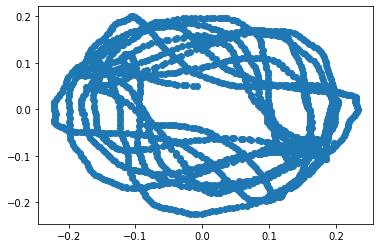

In [52]:
plt.scatter(deltaLong,deltaLat)

In [45]:
print(hercules['Times']/60/60/24)

0          1.825231
10        20.077546
20        38.329861
30        56.582176
40        74.834491
           ...     
1950    3561.026620
1960    3579.278935
1970    3597.531250
1980    3615.783565
1990    3634.035880
Name: Times, Length: 200, dtype: float64


In [55]:
(37250/12354)**3

27.412966809013216

In [56]:
2*np.pi/(15.78*24*60*60)

4.608495067581141e-06

In [63]:
volH = 4/3*np.pi*350**3
volE = 4/3*np.pi*1163**3

mE = 1.616e22
mH = 9.8e18

f = 7

albedo_ratio = (volE/volH)**(2/3)*(mH/mE)**(2/3)*f
print(albedo_ratio)

0.5537467541943679


In [64]:
260**2/1163**2

0.049978965952938444